# House Price Prediction

## Importing libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [4]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3951,2022-06-14,2,15000,1200,2 out of 5,Super Area,Amberpet,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
948,2022-06-30,1,11000,390,Ground out of 4,Carpet Area,Mira Road East,Mumbai,Semi-Furnished,Bachelors/Family,1,Contact Agent
3547,2022-05-25,2,15000,700,1 out of 3,Super Area,Ambattur,Chennai,Furnished,Bachelors/Family,2,Contact Owner
3811,2022-07-06,2,14000,1200,2 out of 4,Super Area,Porur,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
932,2022-07-06,3,150000,1300,6 out of 7,Carpet Area,Seven Bungalows,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Checking shape of the dataset

In [3]:
df.shape

(4746, 12)

## Checking columns of the dataset

In [6]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

## Info about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [10]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## Checking if there is any null value 

In [14]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Checking if there is any duplicated value

In [13]:
df.duplicated().sum()

0

## Checking mean, median, maximum and minimum house rent

In [16]:
print("Mean house rent:", round(df['Rent'].mean()))
print("Median house rent:", round(df['Rent'].median()))
print("Maximum house rent:", round(df['Rent'].max()))
print("Minimum house rent:", round(df['Rent'].min()))

Mean house rent: 34993
Median house rent: 16000
Maximum house rent: 3500000
Minimum house rent: 1200


## 5 highest house rents present in the dataset

In [19]:
df['Rent'].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

## 5 Lowest house rents present in the dataset

In [20]:
df['Rent'].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

## Bar plot for number of house in each city which is available for rent

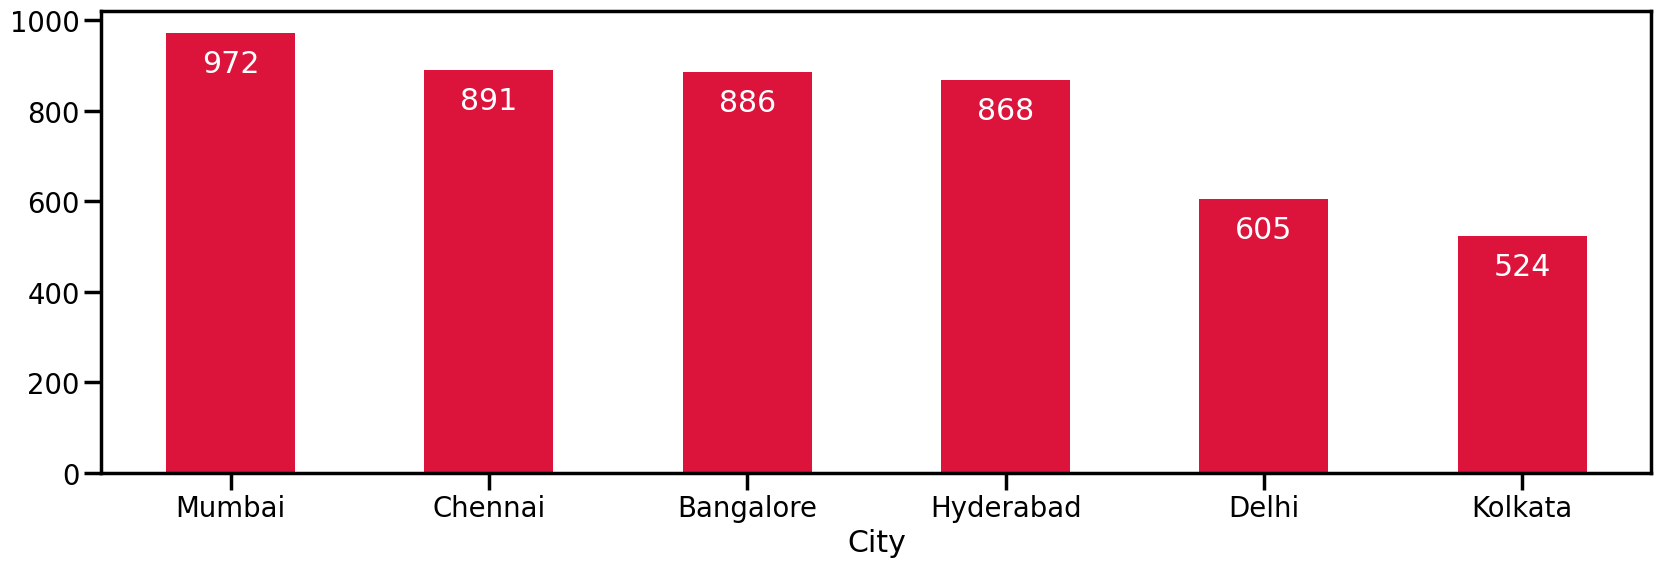

In [61]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(20,6))
ax = df['City'].value_counts().plot(kind = 'bar', color='crimson', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha='center', va='bottom', color='white')

## Bar plot on different types of furnishing status

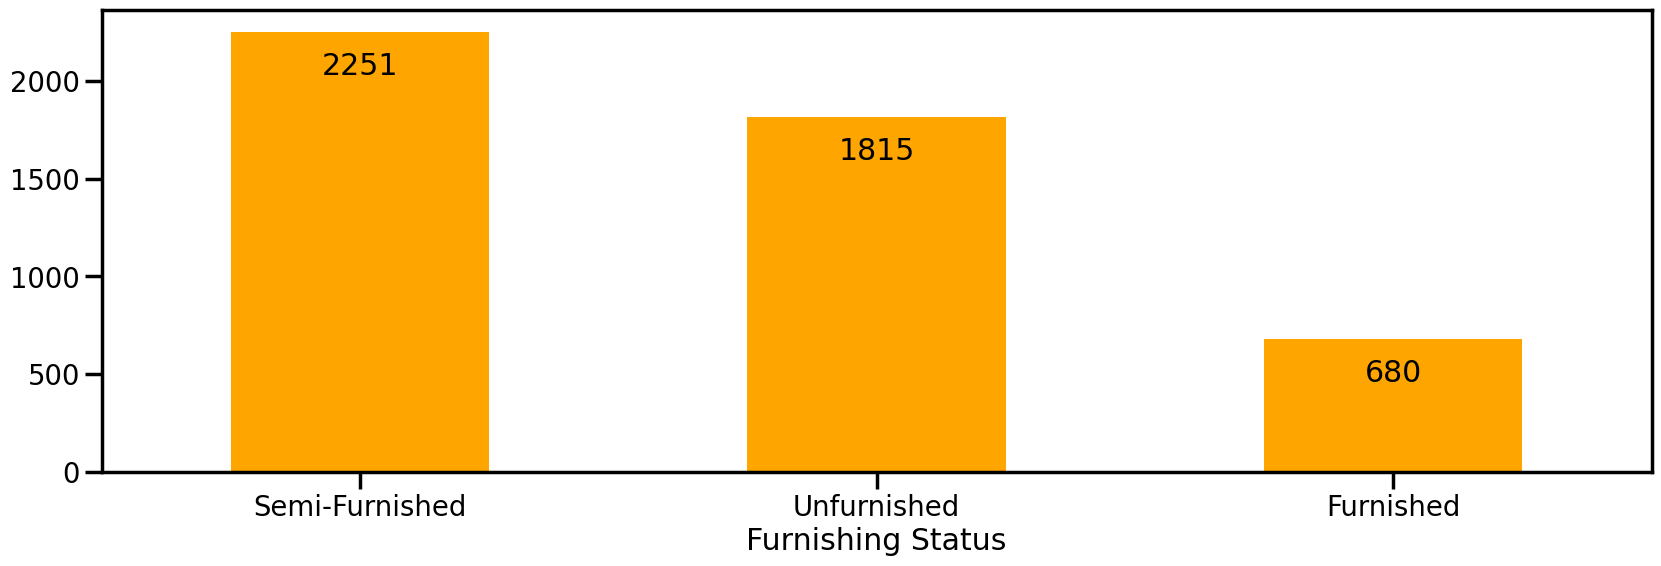

In [70]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(20,6))
ax = df['Furnishing Status'].value_counts().plot(kind = 'bar', color='orange', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha='center', va='bottom', color='black')

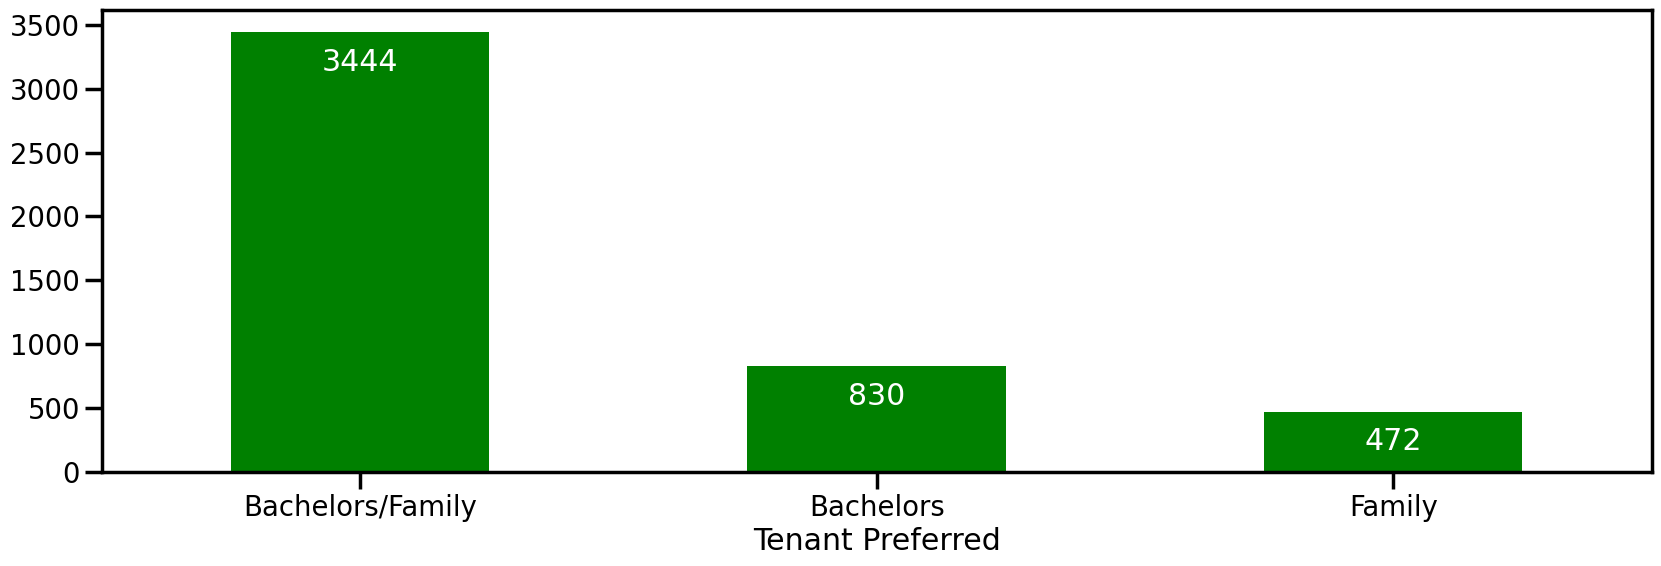

In [68]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(20,6))
ax = df['Tenant Preferred'].value_counts().plot(kind = 'bar', color='green', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 350), ha='center', va='bottom', color='white')

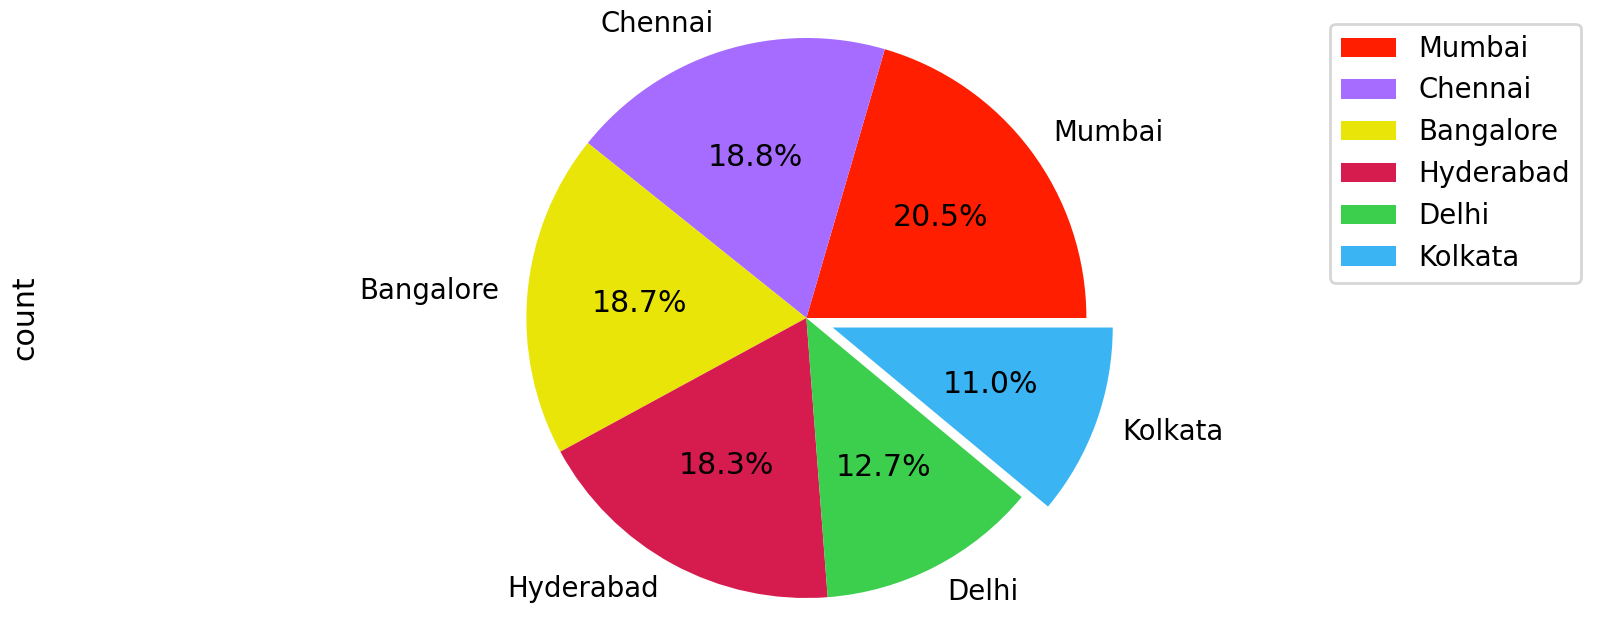

In [90]:
plt.figure(figsize=(20,8))
counts = df['City'].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind='pie', colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

## Scatter plot on house rents vs house sizes

Text(0, 0.5, 'Rent')

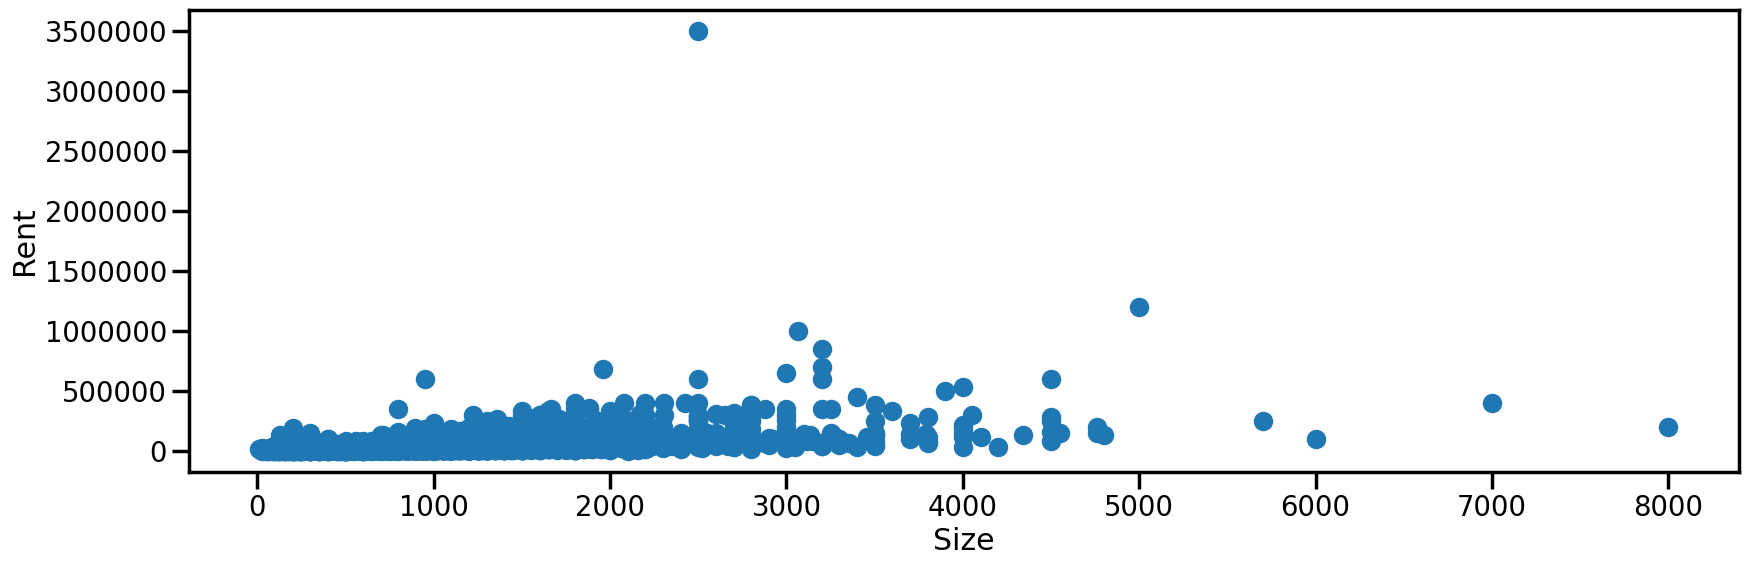

In [94]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(df['Size'], df['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')

## Relationship between House Rent vs House Sizes

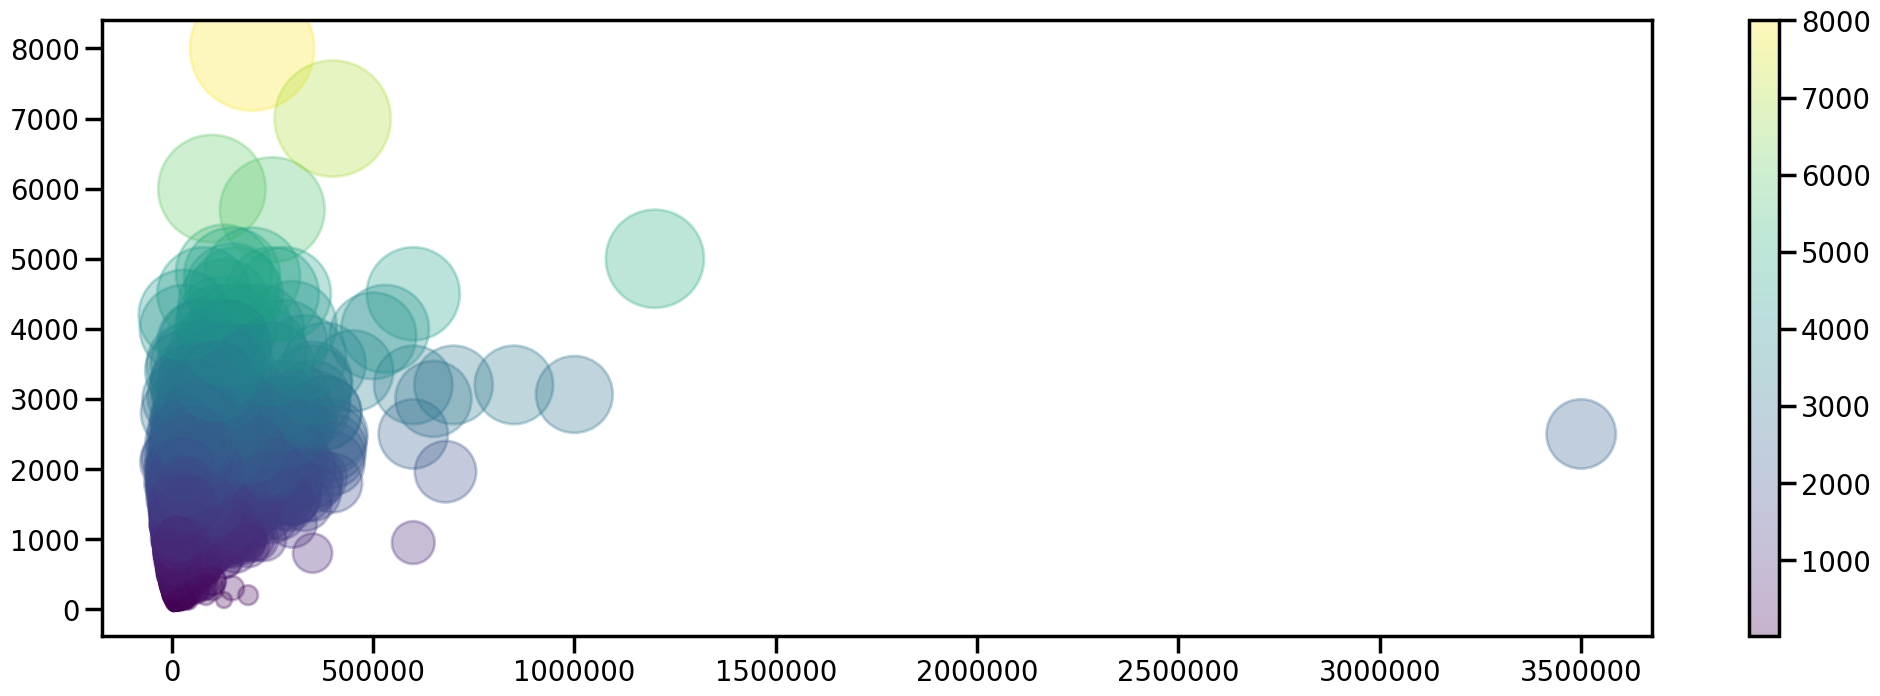

In [96]:
plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(df['Rent'], df['Size'], c = df['Size'], s = df['Size'], alpha = 0.3, cmap = 'viridis')
plt.colorbar()

## Bar plot for City vs house rent

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_9070/631163655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], palette='nipy_spectral')


<Axes: xlabel='City', ylabel='Rent'>

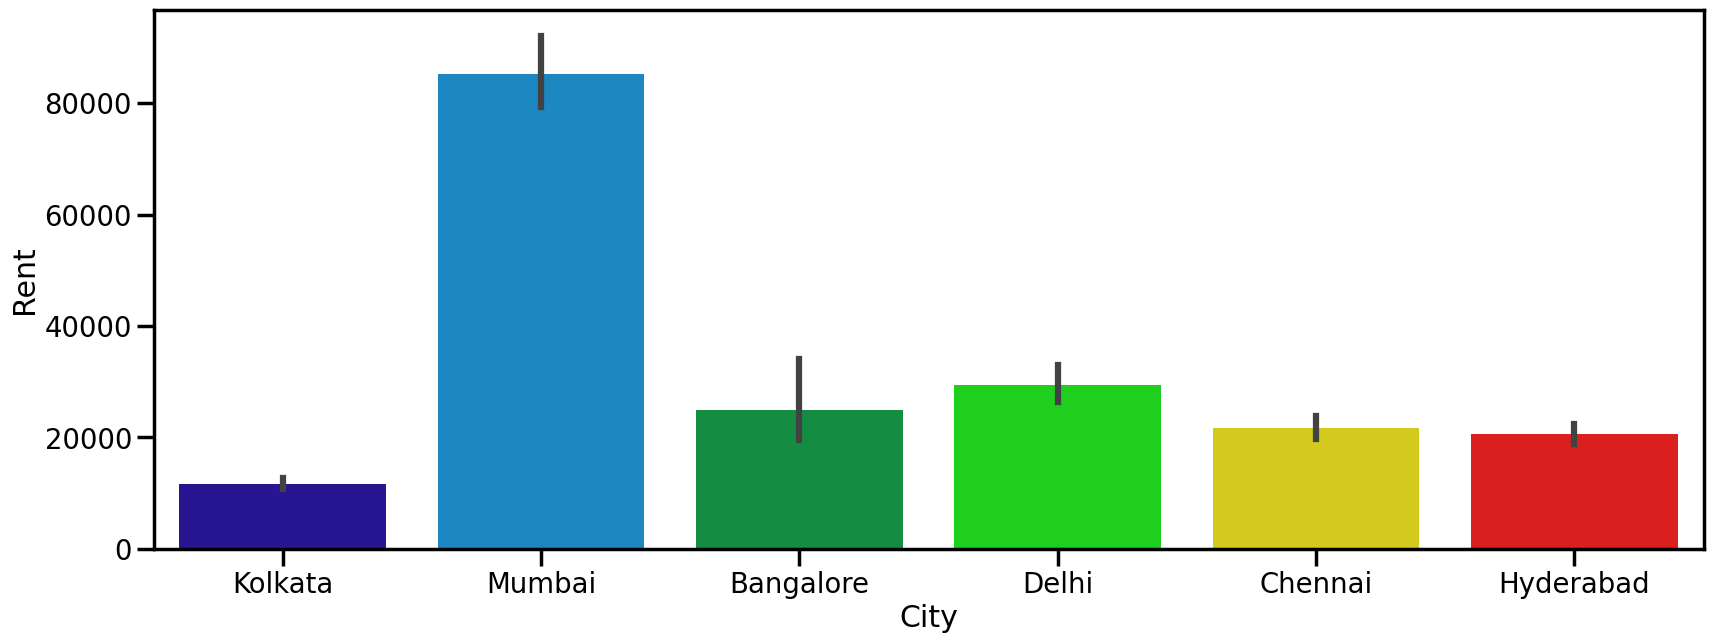

In [97]:
plt.figure(figsize=(20,7))
sns.barplot(x=df['City'], y=df['Rent'], palette='nipy_spectral')

## Histogram on house size

<Axes: >

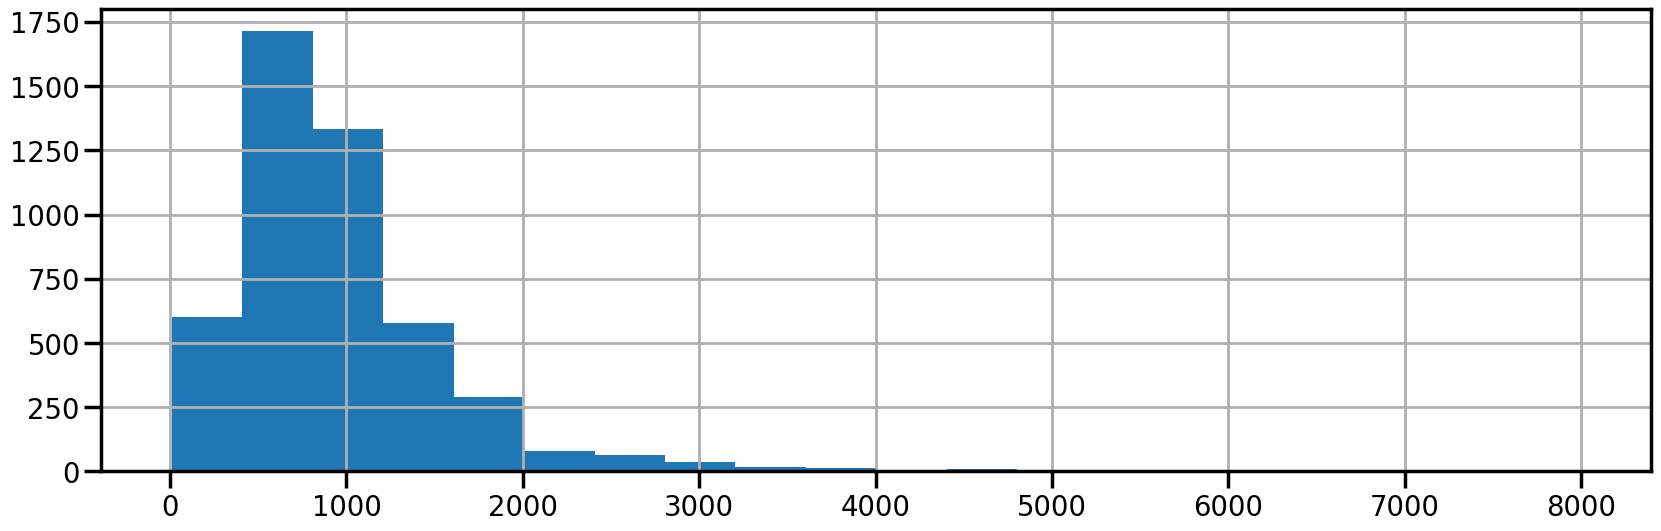

In [98]:
plt.figure(figsize = (20,6))
df['Size'].hist(bins = 20)

## Distribution of diferent numbre of BHK available in the dataset

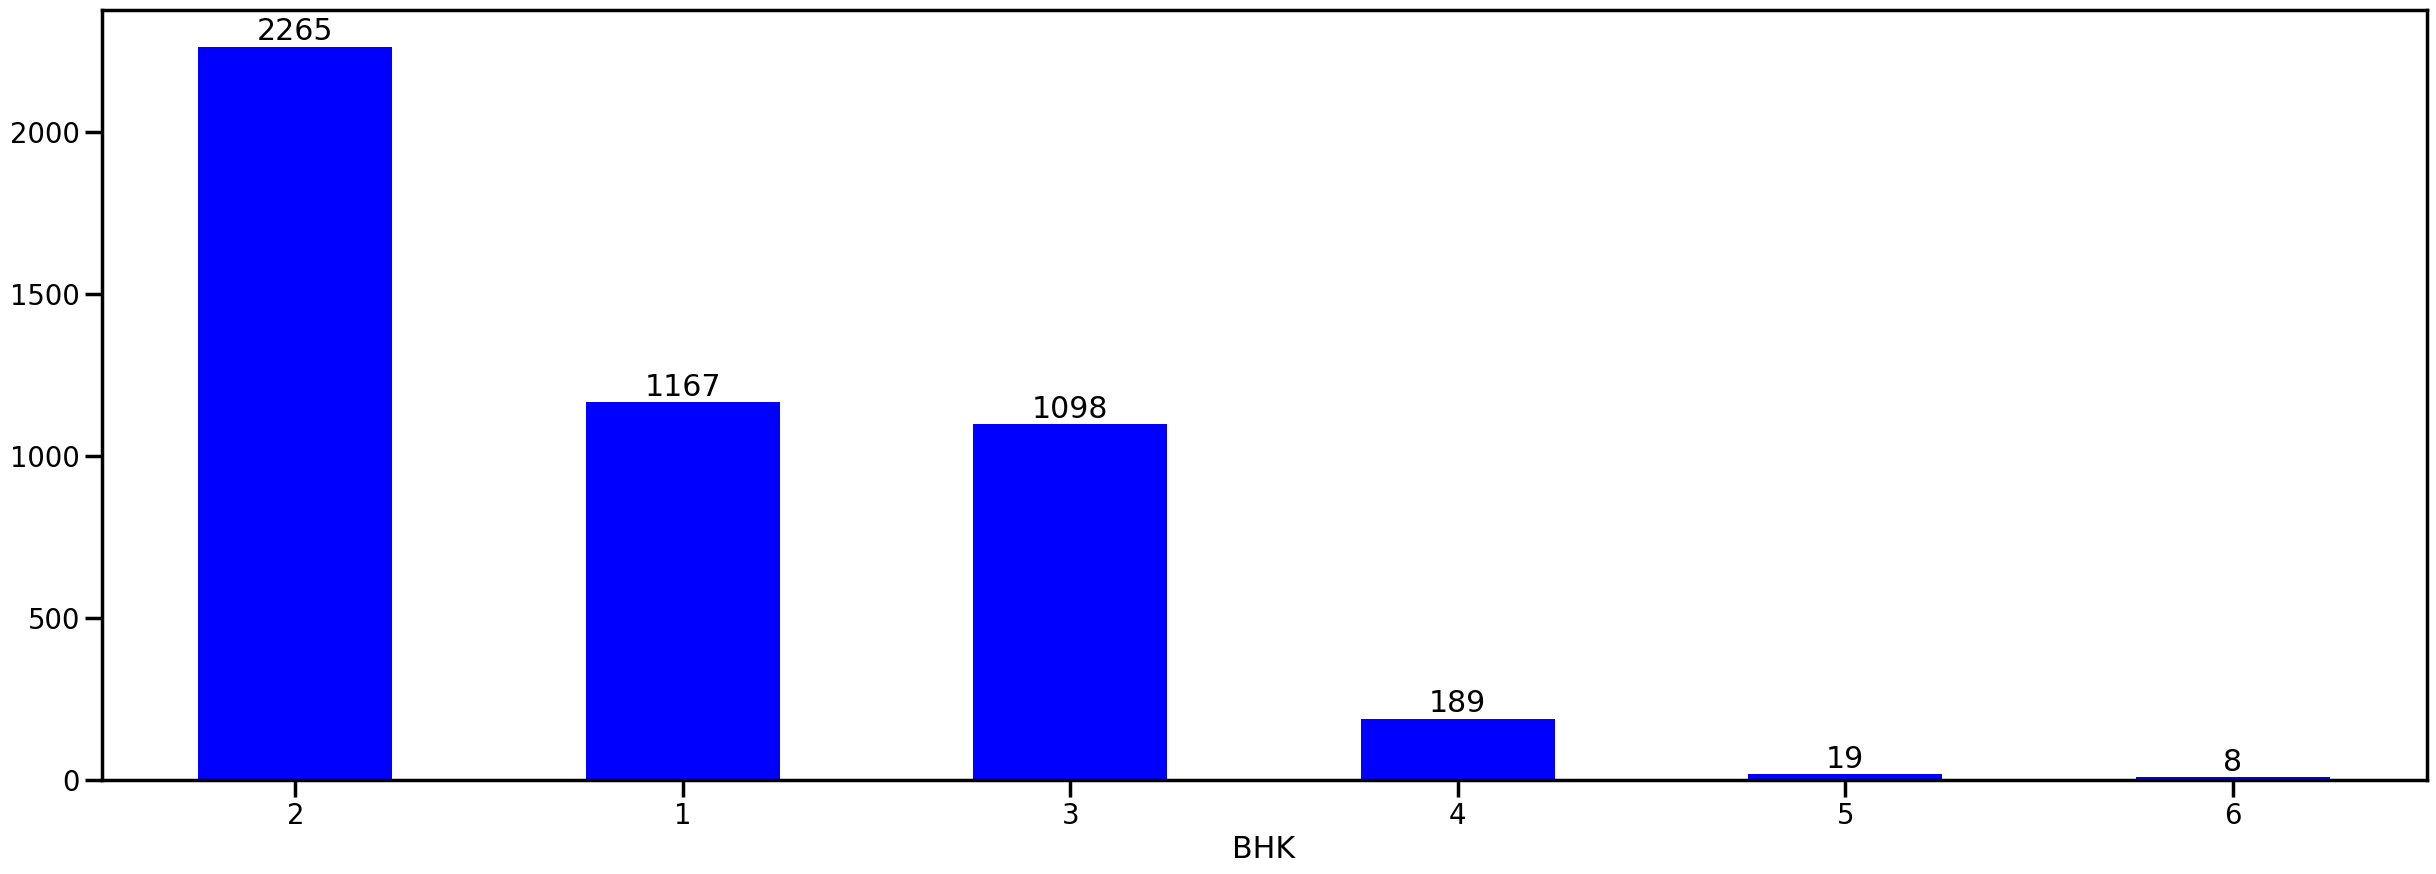

In [99]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(30,10))
ax = df['BHK'].value_counts().plot(kind = 'bar', color='blue', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')

## Distribution of different number of Bathrooms available in the Dataset

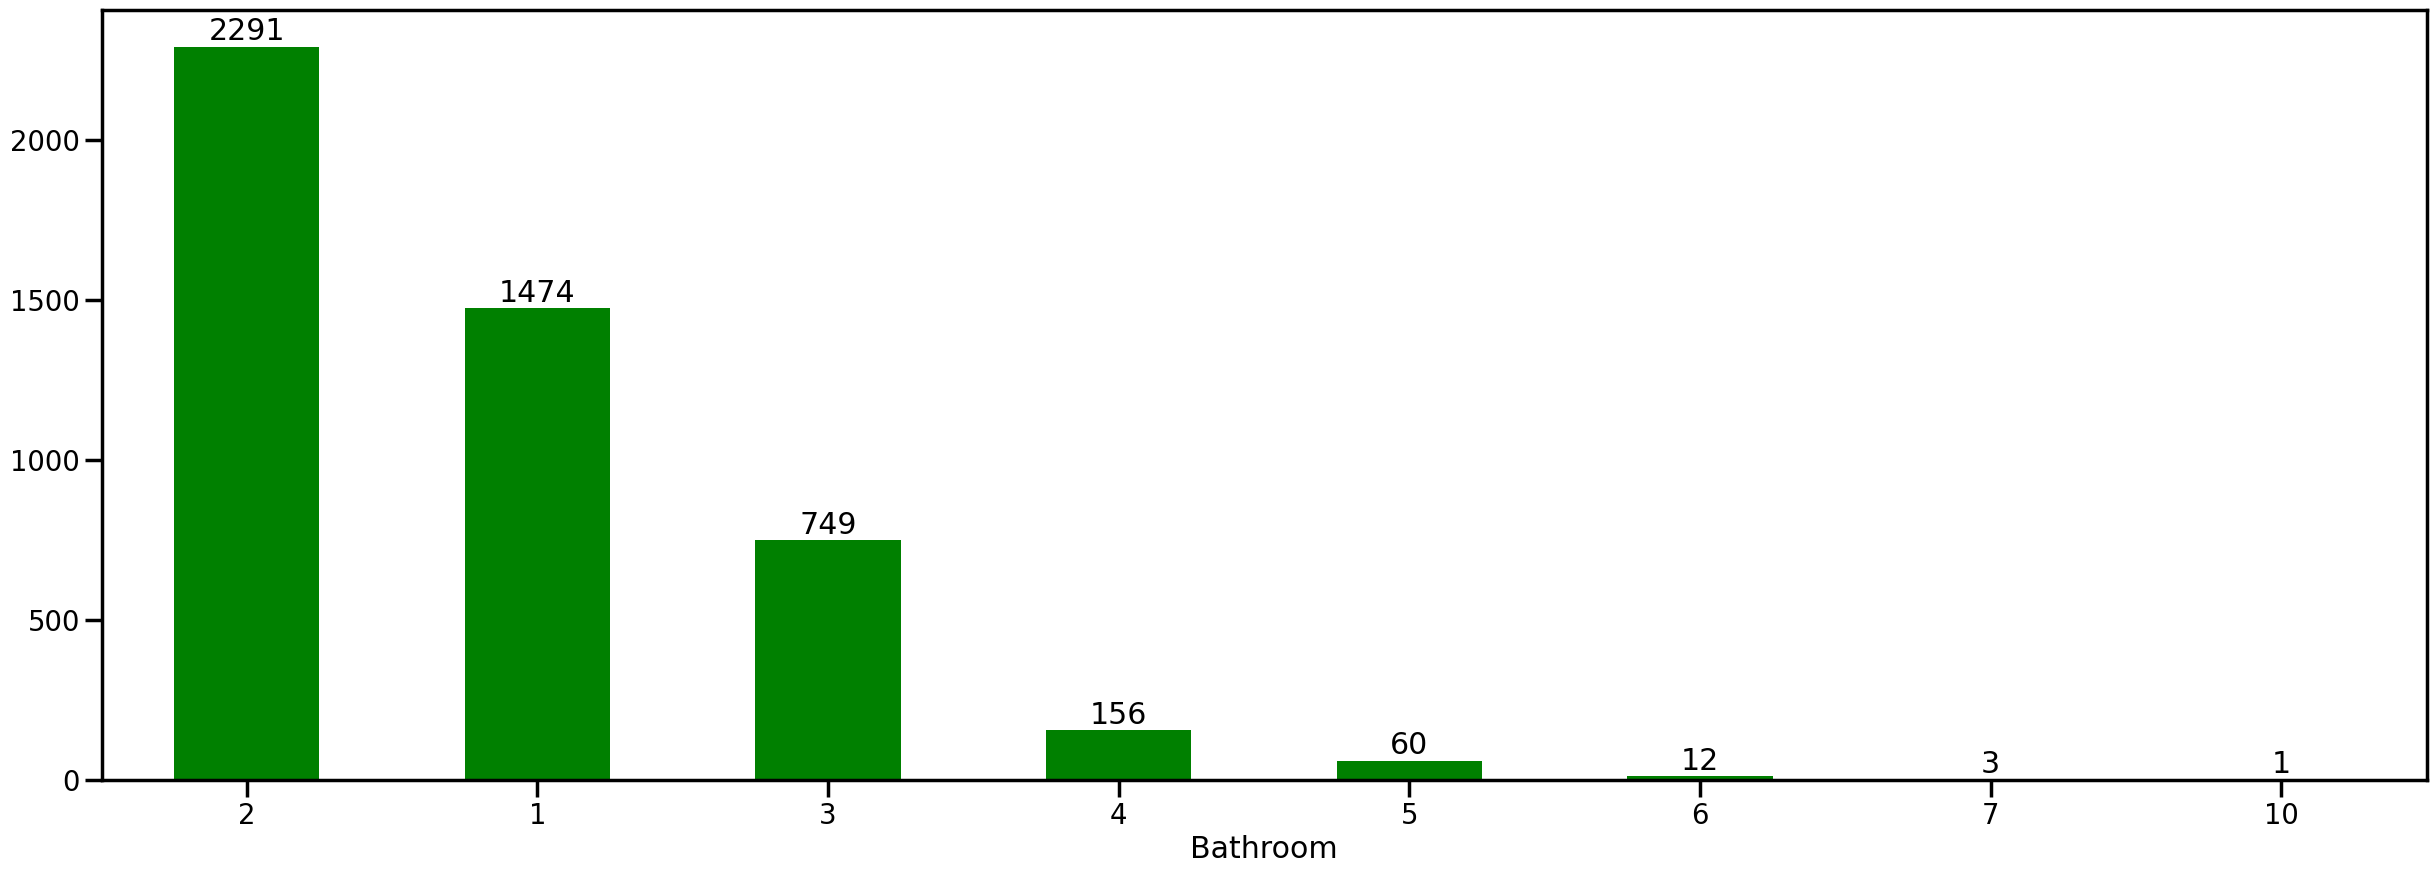

In [101]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(30,10))
ax = df['Bathroom'].value_counts().plot(kind = 'bar', color='green', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')

## Heatmap on BHK vs Area Type

<Axes: xlabel='BHK', ylabel='Area Type'>

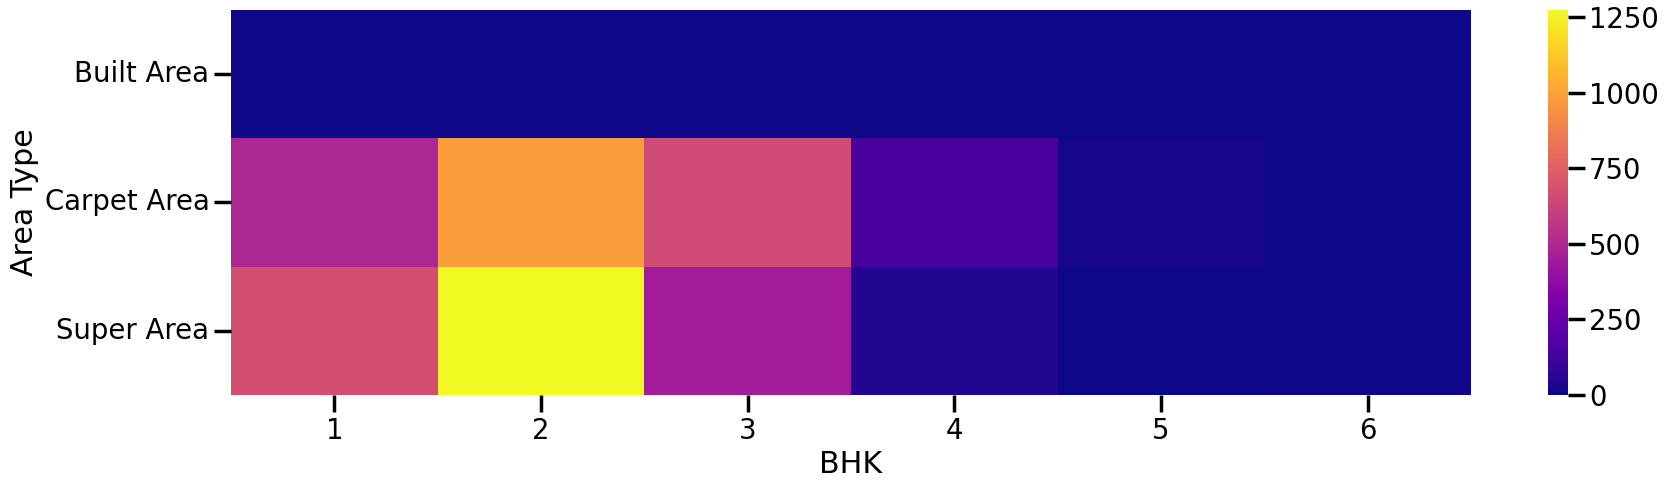

In [104]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(df['Area Type'], df['BHK']), cmap = colormap)

## WordCloud on Area Locality

In [106]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(Company for Company in rent_df["Area Locality"])
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'prism',
                       background_color = "white").generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'